## TASK: CUSTOMER CHURN PREDICTION

DOMAIN : MACHINE LEARNING

# Importing the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

# Data Collection and Processing

In [2]:
# Creating a DataFrame using CSV file
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
# print first five rows of the DataFrame
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# print the number of rows and columns
data.shape

(10000, 14)

In [5]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# checking the null values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# Statistical analysis
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# Dropping irrelevant features
data=data.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# Checking for duplicate data
data.duplicated().any()

False

In [12]:
data["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
data["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

# Encoding Categorical Data

In [14]:
data.replace({"Geography":{"France":0,"Germany":1,"Spain":2},"Gender":{"Female":0,"Male":1}},inplace=True)

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:
a=data["Exited"].value_counts()
a

Exited
0    7963
1    2037
Name: count, dtype: int64

# Data Visualization

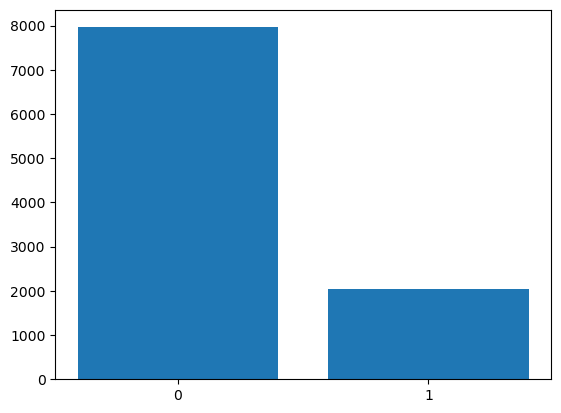

In [17]:
x=["0","1"]
y=[a[i] for i in range(0,2)]
plt.bar(x,y)
plt.show()

# Splitting the new data into Features and Target

In [18]:
X=data.drop("Exited",axis=1)
Y=data["Exited"]

In [19]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [20]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Splitting the data into Testing and Traning data

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)

In [22]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(8000, 10) (8000,) (2000, 10) (2000,)


In [23]:
sc=StandardScaler()

In [24]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [25]:
X_train

array([[ 1.058568  , -0.90593285,  0.90750738, ...,  0.64104192,
        -1.030206  ,  1.04208392],
       [ 0.91362605,  0.30016846,  0.90750738, ...,  0.64104192,
        -1.030206  , -0.62355635],
       [ 1.07927399,  0.30016846, -1.10191942, ...,  0.64104192,
         0.97067965,  0.30812779],
       ...,
       [ 0.16821031, -0.90593285, -1.10191942, ...,  0.64104192,
         0.97067965, -0.55808767],
       [ 0.37527024,  1.50626978,  0.90750738, ...,  0.64104192,
        -1.030206  , -1.35149956],
       [ 1.56586482,  1.50626978,  0.90750738, ..., -1.55996038,
         0.97067965, -1.02692216]])

In [26]:
X_test

array([[-0.68073539, -0.90593285,  0.90750738, ...,  0.64104192,
        -1.030206  , -0.09502138],
       [-1.30191518,  0.30016846,  0.90750738, ..., -1.55996038,
        -1.030206  , -0.778941  ],
       [-0.97061929,  1.50626978, -1.10191942, ..., -1.55996038,
         0.97067965,  0.09946914],
       ...,
       [-1.39509214,  0.30016846, -1.10191942, ..., -1.55996038,
        -1.030206  ,  0.8700859 ],
       [ 0.39597623, -0.90593285,  0.90750738, ..., -1.55996038,
        -1.030206  , -1.47935555],
       [ 1.02750901, -0.90593285,  0.90750738, ...,  0.64104192,
        -1.030206  , -0.49531855]])

# Model Training

In [27]:
model=LogisticRegression()

In [28]:
model.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation

In [29]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [30]:
acc=accuracy_score(Y_test,y_predict)
print("Accuracy score:",acc)

Accuracy score: 0.805


In [31]:
#Precision score of testing data
p=precision_score(Y_test,y_predict)
print("Precision score:",p)

#Recall score of testing data
r=recall_score(Y_test,y_predict)
print("Recall score:",r)

# f1-score on test data
f=f1_score(Y_test,y_predict)
print("f1 score:",f)

Precision score: 0.5858585858585859
Recall score: 0.14250614250614252
f1 score: 0.22924901185770755
